# IFML, exc01b
Johannes Kammerer, Zhao Sun, Tong Yu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
# Scikit-learn
from sklearn.datasets import load_digits
from sklearn import model_selection

## 3.1 Exploring the data

In [2]:
digits = load_digits()
print ( digits.keys())
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]
print ( data.dtype )

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
float64


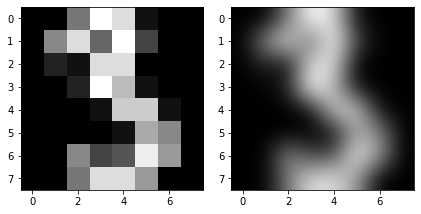

In [3]:
img = digits.images[3]
assert 2 == len(img.shape)

fig = plt.figure(figsize = (6, 3), tight_layout = True)

plt.gray ()
plt.subplot(121)
plt.imshow(img, interpolation = "nearest") # also try interpolation =" bicubic "

plt.subplot(122)
plt.imshow(img, interpolation = "bicubic") # also try interpolation =" bicubic "

plt.show ()

In [4]:
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

In [5]:
X_all = data
y_all = target
X_train , X_test , y_train , y_test = model_selection.train_test_split ( digits.data , digits.target ,
                                                                        test_size = 0.4 , random_state = 0)

In [6]:
X_train[0]

array([ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6.,
        1.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
       11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 12.,  9.,  2.,
        0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9.,
        4., 13.,  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.])

## 3.2 Distance function with loops

In [11]:
def dist_loop(training, test):
    N = training.shape[0]
    M = test.shape[0]
    D = training.shape[1]
    assert D == test.shape[1]
    dist = np.zeros((N, M))
    for n in range(N):
        for m in range(M):
            dist[n, m] = np.linalg.norm(training[n] - test[m]) # Euclidean distance (Frobenius norm)
    return dist # NxM distance matrix

In [10]:
%timeit dist_loop(training = X_train, test = X_test)

8.28 s ± 223 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 3.3 Distance function with vectorization

In [13]:
def dist_vec(training, test):
    N = training.shape[0]
    M = test.shape[0]
    D = training.shape[1]
    assert D == test.shape[1]
    dist = np.zeros((N, M))
    for n in range(N):
        dist[n, :] = np.linalg.norm((training[n]-test[:]), axis = 1) # Euclidean distance (Frobenius norm)
    return dist # NxM distance matrix

In [14]:
%timeit dist_vec(training = X_train, test = X_test)

227 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
(dist_vec(training = X_train, test = X_test) == dist_loop(training = X_train, test = X_test)).all()

True

## 3.4 k nearest neighbor classifier

In [101]:
# partly from Claire

def kNN_classifier(k, X_train, X_test, y_train):
    N, D = X_train.shape
    M, D2 = X_test.shape
    assert D == D2
    
    dist = dist_vec(X_train, X_test)
    pred = np.zeros(M)
    k_indices = dist.argsort(axis = 0)[:k] # choose the top k rows 
    
    for m in range(M):
        k_labels = y_train[k_indices[:,m]] 
        idx = y_train.argsort()[:k]
        labels, counts = np.unique(k_labels,return_counts=True)
        idx = np.argmax(counts)
        pred[m] = labels[idx]
        
    return pred

In [119]:
def err(k, X_train, X_test, y_train, y_test):
    pred = kNN_classifier(k, X_train, X_test, y_train)
    err = (pred != y_test).sum() / y_test.shape[0]
    return err

In [120]:
cond_train = (y_train == 3) | (y_train == 9)
cond_test = (y_test == 3) | (y_test == 9)

In [121]:
kNN_classifier(10, X_train[cond_train], X_test[cond_test], y_train[cond_train])

array([9., 9., 9., 9., 3., 9., 9., 3., 3., 9., 9., 3., 9., 3., 3., 9., 9.,
       3., 9., 3., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 3., 9., 9., 3.,
       3., 3., 3., 3., 9., 3., 3., 9., 9., 9., 9., 3., 3., 3., 9., 3., 3.,
       9., 3., 9., 9., 3., 3., 3., 3., 9., 3., 9., 9., 9., 3., 9., 9., 9.,
       9., 3., 3., 9., 3., 3., 3., 3., 3., 3., 3., 9., 3., 3., 3., 9., 3.,
       9., 3., 3., 3., 9., 3., 9., 9., 3., 3., 9., 3., 3., 9., 3., 3., 9.,
       9., 3., 3., 3., 9., 9., 9., 3., 9., 9., 3., 9., 9., 9., 9., 3., 3.,
       3., 3., 3., 3., 9., 9., 9., 3., 3., 9., 3., 9., 3., 3., 9., 9., 9.,
       9., 9., 3., 3., 3., 3., 9., 9.])

In [129]:
k_val = np.array([1,3,5,9,17,33])
err_val = [err(k_val[i], X_train[cond_train], X_test[cond_test], y_train[cond_train], y_test[cond_test]) for i in range(len(k_val))]

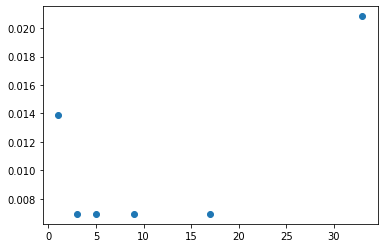

In [132]:
plt.plot(k_val, err_val, 'o')

In [136]:
k_val = np.arange(1, 35)
err_val = [err(k_val[i], X_train[cond_train], X_test[cond_test], y_train[cond_train], y_test[cond_test]) for i in range(len(k_val))]

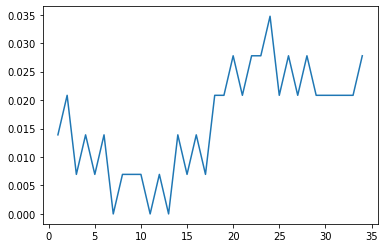

In [138]:
plt.plot(k_val, err_val)